In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from pathlib import Path
import re

from datetime import datetime

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
import os
import glob
import pandas as pd
from PIL import Image

from tools import (
    get_point_coords,
    extract_polygon_region_cv2,
)


plt.rcParams.update({'font.size': 10})

In [18]:
def show_images(img_list, img_id_list = [2, 5, 8, 11, 14, 17, 20, 23, 40]):
    fig, ax = plt.subplots(3, 3, figsize = (16, 16))
    axes = ax.flatten()
    for ax, img_id in zip(axes, img_id_list):
        ax.imshow(img_list[img_id])
    plt.show()

def full_preprocessing_pipeline(frame, mirrors_coords):
    """
    frame: całe zdjęcie teleskopu
    mirrors_coords: lista (x, y, w, h) dla każdego lustra
    """
    # 1. Globalne usunięcie gradientu oświetlenia
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray_frame.astype(float), (101, 101), 0)
    frame_corrected = cv2.normalize(gray_frame - blur, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # 2. Wyciągnij i normalizuj każde lustro
    mirrors = []
    for (x, y, w, h) in mirrors_coords:
        roi = frame_corrected[y:y+h, x:x+w]

        # Lokalna normalizacja
        roi_norm = cv2.normalize(roi, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
        # Opcjonalnie CLAHE dla słabego kontrastu
        # clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4,4))
        # roi_norm = clahe.apply(roi_norm)

        mirrors.append(roi_norm)

    return mirrors

In [5]:
img_dir = Path("/home/pgliwny/Praca/Computer_vision_for_MAGIC/data/data/2025/12/15")
files = sorted(img_dir.glob("IRCamM1T*.jpg"))

In [9]:
img_list = []

for f in files[:]:
    img = Image.open(str(f))
    img_list.append(img)

In [3]:
len(files)

90

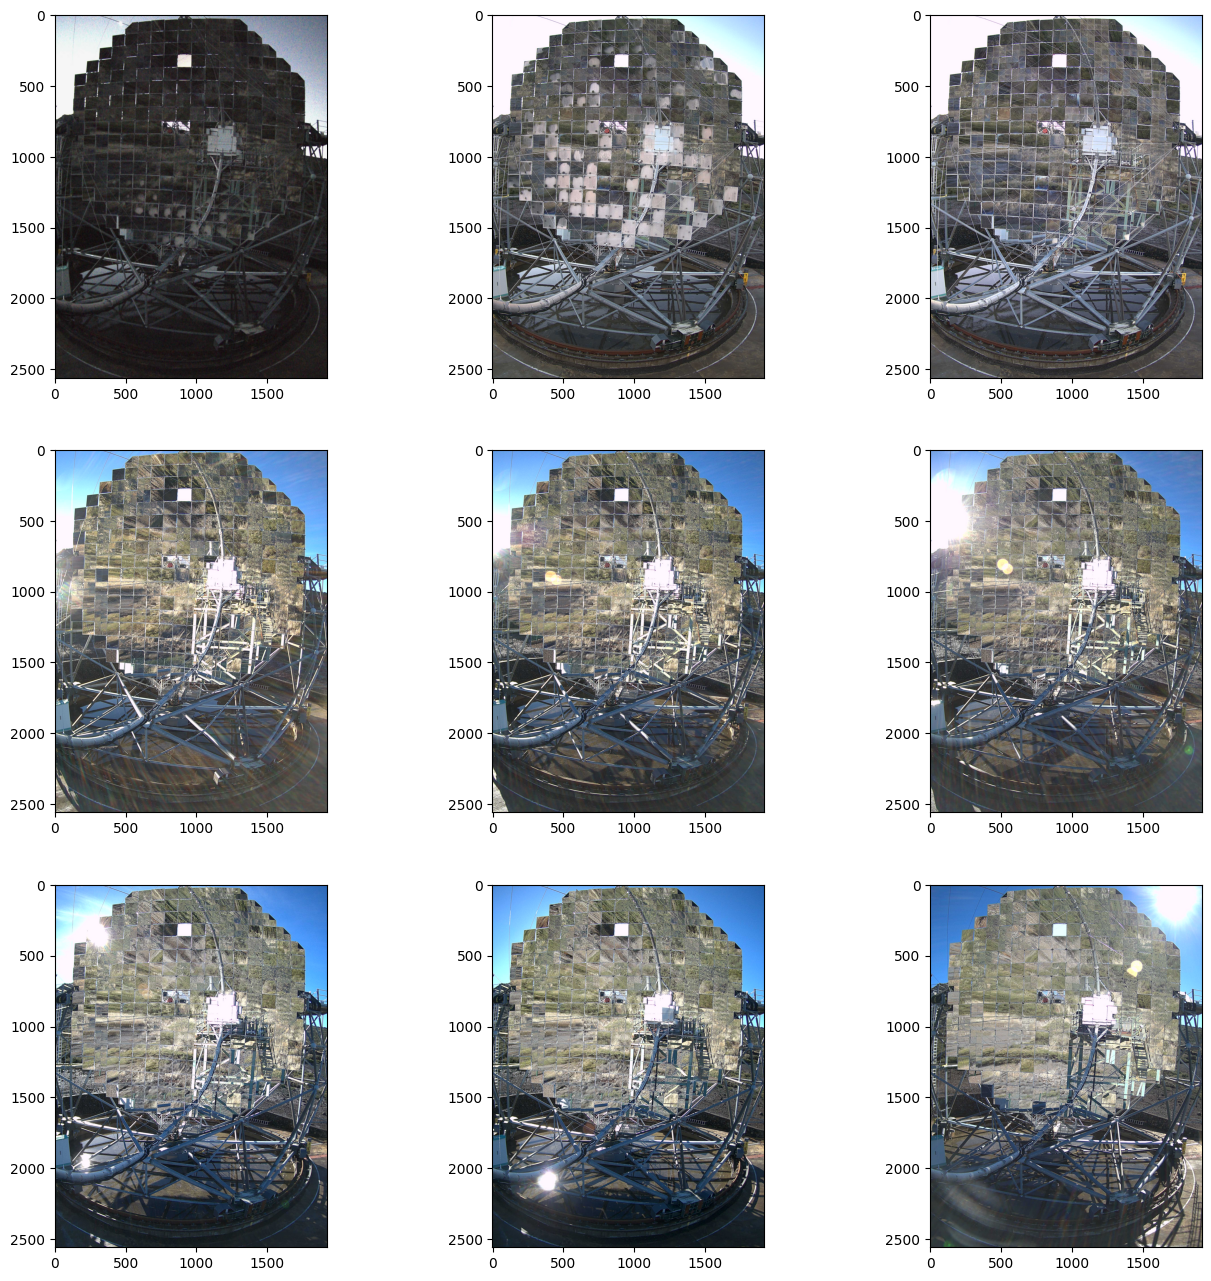

In [19]:
show_images(img_list, img_id_list = [2, 5, 8, 11, 14, 17, 20, 23, 40])

In [9]:
points = get_point_coords(12)

In [11]:
crop = extract_polygon_region_cv2(np.array(img_list[3]), np.array(points))

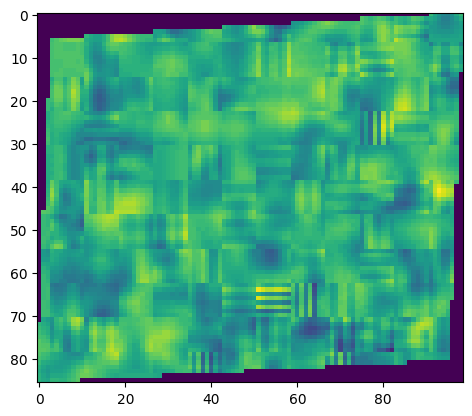

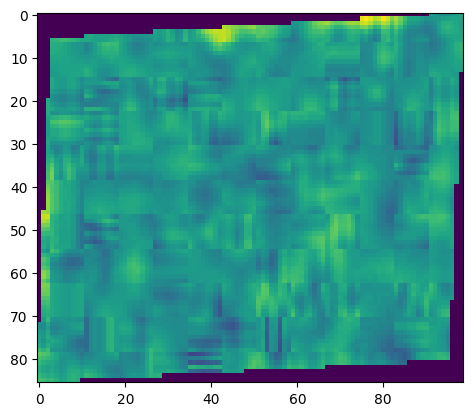

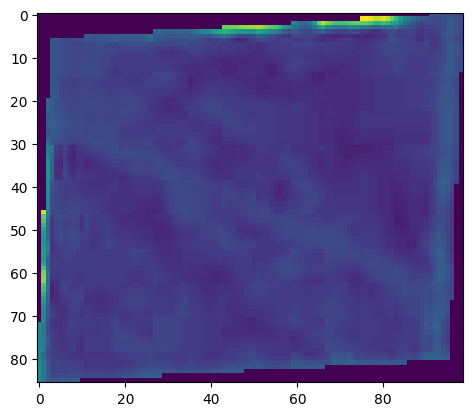

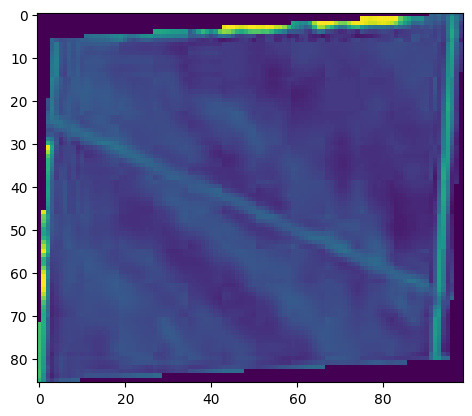

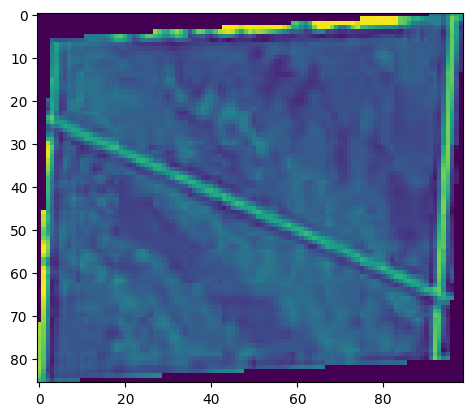

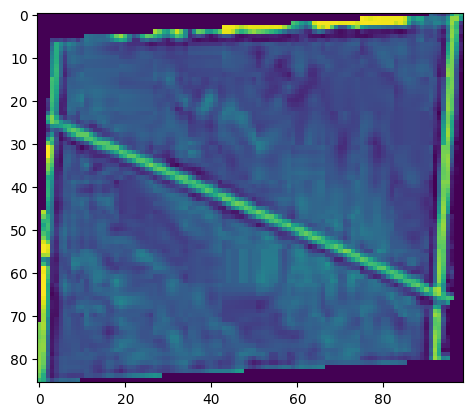

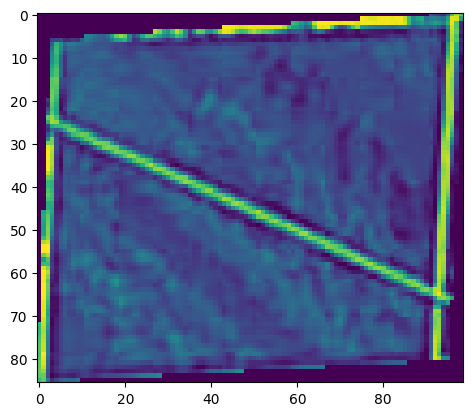

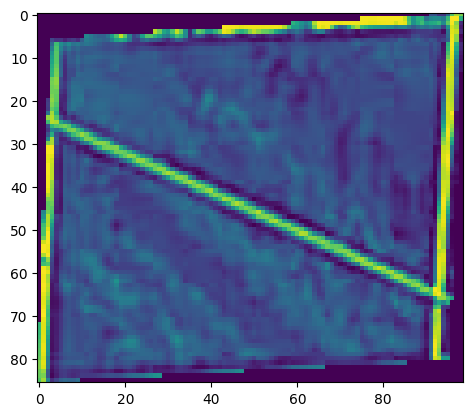

In [18]:
# TO DO clustering similar image and test on this images?
for img in img_list:
    plt.figure()
    crop = extract_polygon_region_cv2(np.array(img), np.array(points))
    plt.imshow(crop)